# Build your own CNN
- Recap

- Data prep

- Building a first CNN
    - Demo
    - Your turn

- Dropout
    - Demo
    - Your turn

Recap poll:<br>
https://forms.gle/bU2w2YMn3p36Dy1S6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

from sklearn.model_selection import train_test_split

### Data ingestion and formatting

In [17]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2,random_state=42)

In [19]:
X_train.shape

(48000, 28, 28)

In [20]:
# the models expects information about the channels used
# reshape data to fit model
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [21]:
X_train[0].shape

(28, 28, 1)

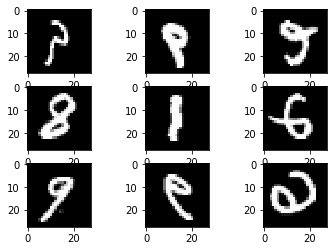

In [8]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
# grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))

    plt.show()
    break

In [9]:
X_train.shape

(48000, 28, 28, 1)

In [23]:
from keras.utils import to_categorical

# one-hot encode target column
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [24]:
y_train.shape

(48000, 10)

# CNNs best practices

## Convolutional layers
Use small kernels/filters:
 - 3x3 or 5x5<br>
 
Use small strides:
 
 - 1 or 2 respectively for the above kernels
 - In general: Strides = (Kernel size -1)/2
 
 #### Discuss:
 How does the shape of our data change after applying a 3x3 convolutional layer with stride 1?
 
 
## Pooling layers
Downsampling of Convolutional output<br>

Use small kernels/filters:
 - 2x2
 - Sometimes you may want to use 3x3 but larger tends to reduce performance heavily<br>
 
Use small strides:
 
 - 2
 - Very rarely 3
 
 #### Discuss:
 By how much do we reduce our data size when we perform a 2x2 pooling of stride 2?


## Flattening layers
- Transform multidimensional data into in the NN into an array that can be used by a Dense Layer
- The nexus between your non-fully-connected and fully-connected layers

# Demo

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, MaxPooling2D

In [35]:
# Intitialise your NN
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(32,kernel_size=(3,3),strides=1,input_shape=(28,28,1),activation='relu'))
# Add a pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2))
# Add a flattening layer
model.add(Flatten())
# Add a dense layer suitable for our problem
model.add(Dense(10,activation='softmax'))
# Compile your CNN
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
# Show summary and compare with your partner
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fit / Validate your model (Keep Epochs to 5 for our example)
model.fit(X_train,y_train,batch_size=1000,epochs=5,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 251us/step - loss: 5.5751 - acc: 0.6305 - val_loss: 3.8297 - val_acc: 0.7504
Epoch 2/5
48000/48000 [==============================] - 12s 260us/step - loss: 3.6348 - acc: 0.7642 - val_loss: 3.5479 - val_acc: 0.7701
Epoch 3/5
48000/48000 [==============================] - 12s 247us/step - loss: 3.4313 - acc: 0.7795 - val_loss: 3.4011 - val_acc: 0.7801
Epoch 4/5
48000/48000 [==============================] - 11s 231us/step - loss: 3.3289 - acc: 0.7869 - val_loss: 3.3576 - val_acc: 0.7833
Epoch 5/5
48000/48000 [==============================] - 12s 244us/step - loss: 3.2829 - acc: 0.7911 - val_loss: 3.3331 - val_acc: 0.7863


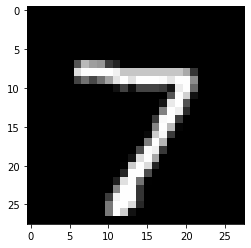

In [42]:
plt.imshow(X_test[:1].reshape(28, 28), cmap=plt.get_cmap('gray'))

In [37]:
model.predict(X_test[:1])

array([[0.0000000e+00, 0.0000000e+00, 4.5872355e-37, 3.9193430e-24,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 3.0297006e-29]], dtype=float32)

## 1 Convolutional layer + 1 Pooling layer

In [12]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                108170    
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 22s 458us/step - loss: 5.9843 - acc: 0.6082 - val_loss: 3.8480 - val_acc: 0.7528
Epoch 2/5
48000/48000 [==============================] - 21s 442us/step - loss: 3.6778 - acc: 0.7641 - val_loss: 3.4781 - val_acc: 0.7777
Epoch 3/5
48000/48000 [==============================] - 22s 453us/step - loss: 3.4619 - acc: 0.7784 - val_loss: 3.3742 - val_acc: 0.7823
Epoch 4/5
48000/48000 [==============================] - 21s 446us/step - loss: 3.3512 - acc: 0.7868 - val_loss: 3.2976 - val_acc: 0.7886
Epoch 5/5
48000/48000 [==============================] - 23s 472us/step - loss: 3.2807 - acc: 0.7917 - val_loss: 3.2551 - val_acc: 0.7910


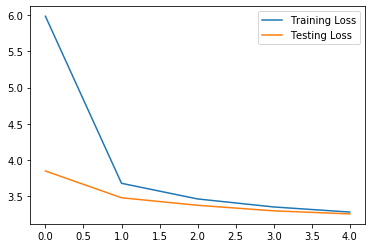

In [14]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

# Now build your CNN

#### Person A:
Output layer one 64 neurons, kernel 3x3<br>
Layer two kernel 2x2
#### Person B:
Output layer one 64 neurons, kernel 5x5<br>
Layer two kernel 2x2

In [ ]:
# Intitialise your NN
# Add a convolutional layer
# Add a pooling layer
# Add a flattening layer
# Add a dense layer suitable for our problem
# Compile your CNN
# Show summary and compare with your partner

In [15]:
# Fit / Validate your model (Keep Epochs to 5 for our example)

## 2 Convolutional layer + 2 Pooling layer

In [30]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=5, verbose=1, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 618us/step - loss: 9.9698 - acc: 0.3677 - val_loss: 9.5322 - val_acc: 0.4028
Epoch 2/5
60000/60000 [==============================] - 37s 620us/step - loss: 9.5330 - acc: 0.4033 - val_loss: 9.4693 - val_acc: 0.4091
Epoch 3/5
60000/60000 [==============================] - 37s 618us/step - loss: 8.9432 - acc: 0.4314 - val_loss: 6.4238 - val_acc: 0.5803
Epoch 4/5
60000/60000 [==============================] - 37s 619us/step - loss: 5.2906 - acc: 0.6409 - val_loss: 3.4149 - val_acc: 0.7478
Epoch 5/5
60000/60000 [==============================] - 37s 618us/step - loss: 1.5307 - acc: 0.8537 - val_loss: 0.1392 - val_acc: 0.9611


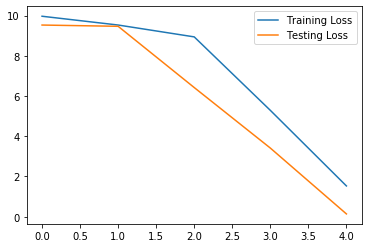

In [32]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

## 2 Convolutional layers

In [16]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=5, verbose=1, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0664 - acc: 0.9800 - val_loss: 0.0722 - val_acc: 0.9772
Epoch 2/50
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0777 - val_acc: 0.9792
Epoch 3/50
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0221 - acc: 0.9930 - val_loss: 0.0829 - val_acc: 0.9793
Epoch 4/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0178 - acc: 0.9943 - val_loss: 0.0966 - val_acc: 0.9796
Epoch 5/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.1051 - val_acc: 0.9799
Epoch 6/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.1171 - val_acc: 0.9779
Epoch 7/50
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0114 - acc: 0.9965 - val_loss: 0.1298 - val_acc

KeyboardInterrupt: 

In [22]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

NameError: name 'history' is not defined

## 7 Convolutional layers

### Deeper networks tend to generalise better

In [67]:
num_classes = 10

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(16, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))
# model.add(Conv2D(8, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 20, 20, 128)       409728    
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        204864    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 12, 12, 64)        102464    
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 2, 2, 16)          4624      
__________

In [68]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, verbose=1, batch_size=1000)

Train on 48000 samples, validate on 10000 samples
Epoch 1/5
48000/48000 [==============================] - 545s 11ms/step - loss: 2.1605 - acc: 0.3868 - val_loss: 0.8026 - val_acc: 0.7334
Epoch 2/5
48000/48000 [==============================] - 552s 11ms/step - loss: 0.5703 - acc: 0.8194 - val_loss: 0.2938 - val_acc: 0.9091
Epoch 3/5
48000/48000 [==============================] - 553s 12ms/step - loss: 0.2657 - acc: 0.9203 - val_loss: 0.1839 - val_acc: 0.9480
Epoch 4/5
48000/48000 [==============================] - 573s 12ms/step - loss: 0.1611 - acc: 0.9522 - val_loss: 0.1140 - val_acc: 0.9634
Epoch 5/5
48000/48000 [==============================] - 543s 11ms/step - loss: 0.1132 - acc: 0.9661 - val_loss: 0.0995 - val_acc: 0.9676


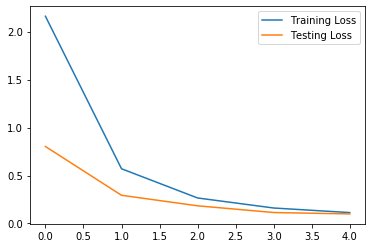

In [69]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()

## Dropout layers
Use small dropout values:
 - 20-50%<br>
 
Can be used on the visible and hidden layers
 
 #### Discuss:
 How does the shape of our data change after applying a dropout layer?